
# FeatureWind — Interactive Notebook (HoloViews + Panel)

This notebook refactors the original Matplotlib script into an **interactive, pointer-driven** visualization using **HoloViews (Bokeh backend)** and **Panel**.  
- Move your mouse over the left plot to select a grid cell — the **wind vane** on the right updates live.  
- Arrows are drawn from **per-feature vectors sampled at the cell center** (no corner averaging), and the **resultant** equals their vector sum.  
- Optional: a lightweight particle preview is provided (reduced count).  
- Bonus: a quick **PygWalker** cell for DataFrame-style EDA.

> If you run in JupyterLab/Notebook, simply execute cells top-to-bottom.


In [1]:
# If needed, uncomment the next cell to install dependencies.
# %pip install holoviews panel bokeh datashader numpy scipy pandas pygwalker colorcet

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
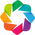

In [2]:
import os, sys, json, math
from pathlib import Path
import numpy as np
import pandas as pd

import holoviews as hv
from holoviews import streams, opts, dim
import panel as pn
from scipy.interpolate import griddata, RegularGridInterpolator

hv.extension('bokeh')
pn.extension()

# Optional (for colors)
try:
    import colorcet as cc
    HAS_COLORCET = True
except Exception:
    HAS_COLORCET = False

# Repo paths – try to locate the project root flexibly
CWD = Path.cwd()
CANDIDATES = [CWD, CWD.parent, CWD.parent.parent, CWD / '..', CWD / '../..']
repo_root = None
for c in CANDIDATES:
    tm = (Path(c) / 'tangentmaps' / 'breast_cancer.tmap').resolve()
    src_dir = (Path(c) / 'src').resolve()
    if tm.exists() and src_dir.exists():
        repo_root = Path(c).resolve()
        break

if repo_root is None:
    print("Couldn't auto-locate repo root. Please set `repo_root` manually to your project root.")
else:
    sys.path.insert(0, str(repo_root / 'src'))

# Import TangentPoint from your project
try:
    from featurewind.TangentPoint import TangentPoint
except Exception as e:
    print("Warning: couldn't import TangentPoint. If you're running outside the repo, add src to sys.path.", e)

In [3]:
def load_data(tangent_map_path):
    """Load and preprocess tangent map data, mirroring the script."""
    with open(tangent_map_path, "r") as f:
        data_import = json.loads(f.read())

    tmap = data_import['tmap']
    col_labels = data_import['Col_labels']
    points = [TangentPoint(entry, 1.0, col_labels) for entry in tmap]
    valid_points = [p for p in points if p.valid]
    all_positions = np.array([p.position for p in valid_points])
    all_grad_vectors = np.array([p.gradient_vectors for p in valid_points])
    return valid_points, all_grad_vectors, all_positions, col_labels

def select_top_features(all_grad_vectors, k):
    feature_magnitudes = np.linalg.norm(all_grad_vectors, axis=2)
    avg_magnitudes = feature_magnitudes.mean(axis=0)
    top_k_indices = np.argsort(-avg_magnitudes)[:k]
    return top_k_indices, avg_magnitudes

def create_grids(positions, all_grad_vectors, top_k_indices, grid_res, kdtree_scale, bounding_box):
    from scipy.spatial import cKDTree
    xmin, xmax, ymin, ymax = bounding_box
    num_vertices = grid_res + 1

    grid_x, grid_y = np.mgrid[xmin:xmax:complex(num_vertices), ymin:ymax:complex(num_vertices)]

    # Distance mask
    kdtree = cKDTree(positions)
    grid_points = np.column_stack((grid_x.ravel(), grid_y.ravel()))
    distances, _ = kdtree.query(grid_points, k=1)
    dist_grid = distances.reshape(grid_x.shape)
    threshold = max(abs(xmax - xmin), abs(ymax - ymin)) * kdtree_scale

    # Interpolate velocity fields for selected features (nearest like script)
    grid_u_feats, grid_v_feats = [], []
    for feat_idx in top_k_indices:
        vectors = all_grad_vectors[:, feat_idx, :]
        grid_u = griddata(positions, vectors[:, 0], (grid_x, grid_y), method='nearest')
        grid_v = griddata(positions, vectors[:, 1], (grid_x, grid_y), method='nearest')
        mask = dist_grid > threshold
        grid_u[mask] = 0.0
        grid_v[mask] = 0.0
        grid_u_feats.append(grid_u)
        grid_v_feats.append(grid_v)

    grid_u_feats = np.array(grid_u_feats)
    grid_v_feats = np.array(grid_v_feats)
    grid_u_sum = np.sum(grid_u_feats, axis=0)
    grid_v_sum = np.sum(grid_v_feats, axis=0)

    # ALL features for dominance
    num_features = all_grad_vectors.shape[1]
    grid_u_all, grid_v_all = [], []
    for feat_idx in range(num_features):
        vectors = all_grad_vectors[:, feat_idx, :]
        grid_u = griddata(positions, vectors[:, 0], (grid_x, grid_y), method='nearest')
        grid_v = griddata(positions, vectors[:, 1], (grid_x, grid_y), method='nearest')
        mask = dist_grid > threshold
        grid_u[mask] = 0.0
        grid_v[mask] = 0.0
        grid_u_all.append(grid_u)
        grid_v_all.append(grid_v)

    grid_u_all = np.array(grid_u_all)
    grid_v_all = np.array(grid_v_all)

    # Dominant features by average corner magnitude
    grid_mag_all = np.sqrt(grid_u_all**2 + grid_v_all**2)
    cell_dominant_features = np.zeros((grid_res, grid_res), dtype=int)
    for i in range(grid_res):
        for j in range(grid_res):
            corner_mags = np.zeros(num_features)
            for feat_idx in range(num_features):
                corner_sum = (grid_mag_all[feat_idx, i, j] +
                              grid_mag_all[feat_idx, i+1, j] +
                              grid_mag_all[feat_idx, i, j+1] +
                              grid_mag_all[feat_idx, i+1, j+1])
                corner_mags[feat_idx] = corner_sum / 4.0
            cell_dominant_features[i, j] = int(np.argmax(corner_mags))

    # Interpolators (sum)
    axes_x = grid_x[:, 0]
    axes_y = grid_y[0, :]
    interp_u_sum = RegularGridInterpolator((axes_x, axes_y), grid_u_sum, bounds_error=False, fill_value=0.0)
    interp_v_sum = RegularGridInterpolator((axes_x, axes_y), grid_v_sum, bounds_error=False, fill_value=0.0)

    # Interp for each feature (center sampling)
    interp_u_all = [RegularGridInterpolator((axes_x, axes_y), grid_u_all[f], bounds_error=False, fill_value=0.0)
                    for f in range(num_features)]
    interp_v_all = [RegularGridInterpolator((axes_x, axes_y), grid_v_all[f], bounds_error=False, fill_value=0.0)
                    for f in range(num_features)]

    return (interp_u_sum, interp_v_sum, grid_x, grid_y,
            grid_u_feats, grid_v_feats, cell_dominant_features,
            grid_u_sum, grid_v_sum, grid_u_all, grid_v_all,
            interp_u_all, interp_v_all)

In [4]:
# --- Load your data ---
if repo_root is None:
    # Set this manually if auto-detection failed
    repo_root = Path(".." ).resolve()

tmap_path = repo_root / 'tangentmaps' / 'breast_cancer.tmap'
valid_points, all_grad_vectors, all_positions, col_labels = load_data(tmap_path)

# Bounding box with padding and square adjustment (same as script)
xmin, xmax = all_positions[:, 0].min(), all_positions[:, 0].max()
ymin, ymax = all_positions[:, 1].min(), all_positions[:, 1].max()

padding = 0.05
x_pad = (xmax - xmin) * padding
y_pad = (ymax - ymin) * padding
xmin, xmax = xmin - x_pad, xmax + x_pad
ymin, ymax = ymin - y_pad, ymax + y_pad

x_range, y_range = xmax - xmin, ymax - ymin
if x_range > y_range:
    y_center = (ymin + ymax) / 2
    ymin, ymax = y_center - x_range / 2, y_center + x_range / 2
else:
    x_center = (xmin + xmax) / 2
    xmin, xmax = x_center - y_range / 2, x_center + y_range / 2

bounding_box = (xmin, xmax, ymin, ymax)

# Params
grid_res = 40
kdtree_scale = 0.03
velocity_scale = 0.04  # used for optional particle preview

# Top-k by average magnitude
k = len(col_labels)
top_k_indices, avg_magnitudes = select_top_features(all_grad_vectors, k)

# Precompute grids & interpolators
(interp_u_sum, interp_v_sum, grid_x, grid_y,
 grid_u_feats, grid_v_feats, cell_dominant_features,
 grid_u_sum, grid_v_sum, grid_u_all, grid_v_all,
 interp_u_all, interp_v_all) = create_grids(
    all_positions, all_grad_vectors, top_k_indices, grid_res, kdtree_scale, bounding_box
)

In [5]:
# ---- Interactive app (pointer-driven wind vane) ----

xmin, xmax, ymin, ymax = bounding_box
viz_cx, viz_cy = 0.5*(xmin+xmax), 0.5*(ymin+ymax)

# Base scatter of points (left panel)
pts = hv.Points(all_positions, kdims=['x','y']).opts(
    width=600, height=600, bgcolor='white', color='gray', size=3, tools=['hover'], active_tools=['pan','wheel_zoom']
)

# Current cell center from coordinates
def cell_center_from_xy(x, y):
    x = float(np.clip(x, xmin, xmax))
    y = float(np.clip(y, ymin, ymax))
    i = int(np.clip((y - ymin) / (ymax - ymin) * grid_res, 0, grid_res - 1))
    j = int(np.clip((x - xmin) / (xmax - xmin) * grid_res, 0, grid_res - 1))

    cell_xmin = xmin + j * (xmax - xmin) / grid_res
    cell_xmax = xmin + (j + 1) * (xmax - xmin) / grid_res
    cell_ymin = ymin + i * (ymax - ymin) / grid_res
    cell_ymax = ymin + (i + 1) * (ymax - ymin) / grid_res
    cx = 0.5 * (cell_xmin + cell_xmax)
    cy = 0.5 * (cell_ymin + cell_ymax)
    return (i, j, cx, cy)

# Feature selection (default: all top-k)
feature_selector = pn.widgets.MultiSelect(
    name='Features', options=[int(i) for i in top_k_indices], value=[int(i) for i in top_k_indices[:6]], sizing_mode='stretch_width'
)

# Scale control
arrow_scale = pn.widgets.FloatSlider(name='Arrow scale (relative)', start=0.1, end=1.5, step=0.05, value=0.6)

# Build wind vane (right panel) using HoloViews VectorField
def build_wind_vane(x, y, selected_features, scale_factor):
    # Fallback: center of canvas if pointer is None
    if (x is None) or (y is None):
        x, y = viz_cx, viz_cy
    i, j, cx, cy = cell_center_from_xy(x, y)

    # Sample per-feature at cell center
    rows = []
    mags = []
    for feat_idx in selected_features:
        u = float(interp_u_all[feat_idx](np.array([[cx, cy]])))
        v = float(interp_v_all[feat_idx](np.array([[cx, cy]])))
        mag = float(np.hypot(u, v))
        if mag <= 0:
            continue
        angle = np.arctan2(v, u)  # radians
        rows.append((viz_cx, viz_cy, angle, mag, int(feat_idx)))
        mags.append(mag)

    if not rows:
        return hv.Text(viz_cx, viz_cy, 'No vectors here').opts(text_color='black')

    max_mag = max(mags)
    canvas_size = min(xmax - xmin, ymax - ymin)
    target_length = canvas_size * 0.30 * scale_factor
    dynamic_scale = max_mag / target_length if max_mag > 0 else 1.0

    # Convert to angle/mag for VectorField with fixed scaling
    df = pd.DataFrame(rows, columns=['x','y','angle','mag','feature'])

    vf = hv.VectorField(df, kdims=['x','y'], vdims=['angle','mag']).opts(
        opts.VectorField(
            color='feature', cmap='Category10', line_width=2,
            pivot='tail', rescale_lengths=False, magnitude=dim('mag')/dynamic_scale,
            width=600, height=600
        )
    )

    # Resultant (sum of the same sampled vectors)
    sum_u = float(np.sum([float(interp_u_all[f](np.array([[cx, cy]]))) for f in selected_features]))
    sum_v = float(np.sum([float(interp_v_all[f](np.array([[cx, cy]]))) for f in selected_features]))
    res_mag = float(np.hypot(sum_u, sum_v))
    if res_mag > 0:
        res_angle = np.arctan2(sum_v, sum_u)
        res_df = pd.DataFrame([(viz_cx, viz_cy, res_angle, res_mag)], columns=['x','y','angle','mag'])
        res_vf = hv.VectorField(res_df, kdims=['x','y'], vdims=['angle','mag']).opts(
            opts.VectorField(color='black', line_width=4, pivot='tail', rescale_lengths=False,
                             magnitude=dim('mag')/dynamic_scale)
        )
        return (vf * res_vf).opts(title=f'Wind Vane — cell ({i},{j})')
    else:
        return vf.opts(title=f'Wind Vane — cell ({i},{j})')

# Pointer stream attached to the scatter
pointer = streams.PointerXY(x=viz_cx, y=viz_cy, source=pts)

# Dynamic map that updates from pointer + widgets
wind_vane_dm = hv.DynamicMap(lambda x, y, sel, sc: build_wind_vane(x, y, sel, sc),
                             streams=[pointer, streams.Params(feature_selector, parameters=['value'], rename={'value':'sel'}),
                                      streams.Params(arrow_scale, parameters=['value'], rename={'value':'sc'})])

left = pts.opts(title='Feature Wind Map (pointer = cell pick)')
right = wind_vane_dm

dashboard = pn.Row(left, right, pn.Column(feature_selector, arrow_scale), sizing_mode='stretch_width')
dashboard

/var/folders/kt/8729r9s16_15cc905qks8zl40000gn/T/ipykernel_57050/1750779940.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u = float(interp_u_all[feat_idx](np.array([[cx, cy]])))
/var/folders/kt/8729r9s16_15cc905qks8zl40000gn/T/ipykernel_57050/1750779940.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v = float(interp_v_all[feat_idx](np.array([[cx, cy]])))
/var/folders/kt/8729r9s16_15cc905qks8zl40000gn/T/ipykernel_57050/1750779940.py:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operatio

Row(sizing_mode='stretch_width')
    [0] HoloViews(Points, height=600, sizing_mode='fixed', width=600)
    [1] HoloViews(DynamicMap, height=600, sizing_mode='fixed', width=600)
    [2] Column
        [0] MultiSelect(name='Features', options=[21, 24, 8, 1, ...], sizing_mode='stretch_width', value=[21, 24, 8, 1, 11, 27])
        [1] FloatSlider(end=1.5, name='Arrow scale (relative)', start=0.1, step=0.05, value=0.6)